In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn.metrics import mean_squared_error
np.set_printoptions(suppress=True)

In [2]:
data = pd.read_csv('./data/district_covariates/all_covariates_clustered.csv')
data.head()

district  reg_year  reg_month  count_lag_month  count_lag_year  count  \
0     Agra      2016          1             1235            1235   1235   
1     Agra      2016          2             1235            1192   1192   
2     Agra      2016          3             1192            1160   1160   
3     Agra      2016          4             1160            1160   1160   
4     Agra      2016          5             1160            1409   1409   

   male_15_24yr_2011  total_population_2011  sex_ratio_2011  total_non_worker  \
0           588704.0              4558268.0           844.0         3028953.0   
1           588704.0              4558268.0           844.0         3028953.0   
2           588704.0              4558268.0           844.0         3028953.0   
3           588704.0              4558268.0           844.0         3028953.0   
4           588704.0              4558268.0           844.0         3028953.0   

   gdp_2011_12  class  
0     13058.94      2  
1     13058.94      2  
2     13058.94      2  
3     13058.94      2  
4     13058.94      2

#### Normalizing or  Quantization

In [3]:
norm = True
#norm = False

In [4]:
df = data.copy()
if norm:
    # removing columns that dont need normalisation
    cols = data.columns
    normalise_cols = list(set(cols)-set(['count', 'district', 'class', 'count_lag_year'
                                         , 'count_lag_month', 'reg_month', 'reg_year', 'sex_ratio_2011']))
    # normalising columns
    for colname in normalise_cols:
        df[colname] = (data[colname] - data[colname].min())/(data[colname].max() - data[colname].min())
else:
    df['male_15_24yr_2011'] = df['male_15_24yr_2011'] / df['total_population_2011']
    df['total_non_worker'] = df['total_non_worker'] / df['total_population_2011']
    #df['gdp_2011_12'] = df['gdp_2011_12'] / df['total_population_2011']

df.head()

district  reg_year  reg_month  count_lag_month  count_lag_year  count  \
0     Agra      2016          1             1235            1235   1235   
1     Agra      2016          2             1235            1192   1192   
2     Agra      2016          3             1192            1160   1160   
3     Agra      2016          4             1160            1160   1160   
4     Agra      2016          5             1160            1409   1409   

   male_15_24yr_2011  total_population_2011  sex_ratio_2011  total_non_worker  \
0           0.790661               0.734132           844.0           0.75468   
1           0.790661               0.734132           844.0           0.75468   
2           0.790661               0.734132           844.0           0.75468   
3           0.790661               0.734132           844.0           0.75468   
4           0.790661               0.734132           844.0           0.75468   

   gdp_2011_12  class  
0     0.707565      2  
1     0.707565      2  
2     0.707565      2  
3     0.707565      2  
4     0.707565      2

In [5]:
data = df.copy()

In [6]:
districts = data['district'].unique()                      # 'districts' contains list of unique districts names
num_districts = len(districts)                             # 'num_districts' contains no. of unique districts
dist_lookup = dict(zip(districts, range(num_districts)))   # 'dist_lookup' is a dict, ex. ['agra':0, ... ]
districts_code_all = data['district_code'] = data.district.replace(dist_lookup).values
print('#of districts: ', num_districts)

#of districts:  75


In [7]:
cluster_0 = data[data['class']==0]
cluster_1 = data[data['class']==1]
cluster_2 = data[data['class']==2]
cluster_3 = data[data['class']==3]
cluster_4 = data[data['class']==4]
cluster_5 = data[data['class']==5]
cluster_6 = data[data['class']==6]
cluster_7 = data[data['class']==7]
cluster_8 = data[data['class']==8]
cluster_9 = data[data['class']==9]
cluster_10 = data[data['class']==10]

print('\nClass 0: # of districts:', cluster_0['district'].unique().size, '\n', cluster_0['district'].unique())
print('\nClass 1: # of districts:', cluster_1['district'].unique().size, '\n', cluster_1['district'].unique())
print('\nClass 2: # of districts:', cluster_2['district'].unique().size, '\n', cluster_2['district'].unique())
print('\nClass 3: # of districts:', cluster_3['district'].unique().size, '\n', cluster_3['district'].unique())
print('\nClass 4: # of districts:', cluster_4['district'].unique().size, '\n', cluster_4['district'].unique())
print('\nClass 5: # of districts:', cluster_5['district'].unique().size, '\n', cluster_5['district'].unique())
print('\nClass 6: # of districts:', cluster_6['district'].unique().size, '\n', cluster_6['district'].unique())
print('\nClass 7: # of districts:', cluster_7['district'].unique().size, '\n', cluster_7['district'].unique())
print('\nClass 8: # of districts:', cluster_8['district'].unique().size, '\n', cluster_8['district'].unique())
print('\nClass 9: # of districts:', cluster_9['district'].unique().size, '\n', cluster_9['district'].unique())
print('\nClass 10: # of districts:', cluster_10['district'].unique().size, '\n', cluster_10['district'].unique())


Class 0: # of districts: 9 
 ['Bahraich' 'Ballia' 'Barabanki' 'Deoria' 'Gonda' 'Pratapgarh'
 'Rae Bareli' 'Shahjahanpur' 'Unnao']

Class 1: # of districts: 9 
 ['Banda' 'Bhadohi' 'Etawah' 'Gautam Budh Nagar' 'Hathras' 'Jalaun'
 'Kannauj' 'Kaushambi' 'Sant Kabeer Nagar']

Class 2: # of districts: 10 
 ['Agra' 'Azamgarh' 'Bareilly' 'Ghaziabad' 'Gorakhpur' 'Jaunpur'
 'Kanpur City' 'Lucknow' 'Moradabad' 'Sitapur']

Class 3: # of districts: 9 
 ['Ambedkar Nagar' 'Ayodhya' 'Basti' 'Fatehpur' 'Mathura' 'Mau' 'Mirzapur'
 'Rampur' 'Siddharth Nagar']

Class 4: # of districts: 7 
 ['Auraiya' 'Baghpat' 'Chitrakoot' 'Hamirpur' 'Lalitpur' 'Mahoba'
 'Shravasti']

Class 5: # of districts: 3 
 ['Hardoi' 'Kheri' 'Muzaffar Nagar']

Class 6: # of districts: 2 
 ['Etah' 'Kasganj']

Class 7: # of districts: 1 
 ['Prayagraj']

Class 8: # of districts: 10 
 ['Aligarh' 'Badaun' 'Bijnor' 'Bulandshahar' 'Ghazipur' 'Kushi Nagar'
 'Meerut' 'Saharanpur' 'Sultanpur' 'Varanasi']

Class 9: # of districts: 6 
 ['Ameth

##### if need be, divide cluster into 2 smailler clusters

In [8]:
# half_col = np.random.choice(cluster_0['district'].unique(), 7, replace=False).tolist()
# half_col1 = list(set(cluster_0['district'].unique()) - set(half_col))

# cluster_half1 = data[data['district'].isin(half_col)]
# cluster_half2 = data[data['district'].isin(half_col1)]
# cluster_half2['district'].unique().size

# StanModel

In [9]:
import pystan

In [10]:
try:
    model = pickle.load(open('./model/partial_pooling.pkl', 'rb'))
except:
    model_code = """
    data {
        int<lower=1>         N;                      // number of districts
        int<lower=1>         M;                      // number of months
        int<lower=1>         num_attr;               // number of attributes
        int<lower=num_attr>  sigma_beta_dof;         // (degree_of_freedom)parameter for inv_wishart prior on sigma_beta
        int<lower=N>         sigma_error_dof;        // (degree_of_freedom)parameter for inv_wishart prior on sigma_error
        real<lower=0.0>      alpha_mean;                         
        real<lower=0.0>      alpha_variance;
        real<lower=0.0>      mu_beta_mean;
        real<lower=0.0>      mu_beta_variance;
        real<lower=0.0>      sigma_beta_variance;    // diagonal value for matrix, parameter for inv_wishart
        real<lower=0.0>      sigma_error_variance;   // diagonal value for matrix, parameter for inv_wishart
        
        matrix[M, num_attr]  X[N];
        vector[N]            crime_count[M];
    }

    parameters {
        vector<lower=0.0>[N]               alpha;
        vector[num_attr]        beta[N];
        vector[num_attr]        mu_beta;
        cov_matrix[num_attr]    sigma_beta;
        cov_matrix[N]           sigma_err;
    }

    transformed parameters {
        vector[N]    crime_count_hat[M];
        for(j in 1:N) {
            for(t in 1:M) {
                crime_count_hat[t, j] = alpha[j] + dot_product(X[j, t], beta[j]);
            }
        }
    }
    
    model {
        mu_beta     ~    multi_normal(rep_vector(mu_beta_mean, num_attr), diag_matrix(rep_vector(mu_beta_variance,num_attr)));
        sigma_beta  ~    inv_wishart(sigma_beta_dof, diag_matrix(rep_vector(sigma_beta_variance,num_attr)));
        for(j in 1:N){
            alpha[j]       ~    normal(alpha_mean, alpha_variance);
            beta[j]        ~    multi_normal(mu_beta, sigma_beta);
        }
        sigma_err   ~    inv_wishart(sigma_error_dof, diag_matrix(rep_vector(sigma_error_variance,N)));
        for(t in 1:M){
            crime_count[t] ~  multi_normal(crime_count_hat[t], sigma_err);
        }
    }
    """
    model = pystan.model.StanModel(model_code=model_code, model_name='partial_pooling')
    with open('./model/partial_pooling.pkl', 'wb') as f:
        pickle.dump(model, f)

In [31]:
# try:
#     model = pickle.load(open('./model/partial_pooling_no_inverse_wishartt.pkl', 'rb'))
# except:
#     model_code = """
#     data {
#         int<lower=1>         N;                      // number of districts
#         int<lower=1>         M;                      // number of months
#         int<lower=1>         num_attr;               // number of attributes
#         int<lower=num_attr>  sigma_beta_dof;         // (degree_of_freedom)parameter for inv_wishart prior on sigma_beta
#         int<lower=N>         sigma_error_dof;        // (degree_of_freedom)parameter for inv_wishart prior on sigma_error
#         real<lower=0.0>      alpha_mean;                         
#         real<lower=0.0>      alpha_variance;
#         real<lower=0.0>      mu_beta_mean;
#         real<lower=0.0>      mu_beta_variance;
#         real<lower=0.0>      sigma_beta_variance;    // diagonal value for matrix, parameter for inv_wishart
#         real<lower=0.0>      sigma_error_variance;   // diagonal value for matrix, parameter for inv_wishart
        
#         matrix[M, num_attr]  X[N];
#         vector[N]            crime_count[M];
#     }

#     parameters {
#         vector<lower=0.0>[N]               alpha;
#         vector<lower=0.0>[num_attr]        beta[N];
#         vector<lower=0.0>[num_attr]        mu_beta;
#         cov_matrix[num_attr]    sigma_beta;
#     }

#     transformed parameters {
#         vector[N]    crime_count_hat[M];
#         for(j in 1:N) {
#             for(t in 1:M) {
#                 crime_count_hat[t, j] = alpha[j] + dot_product(X[j, t], beta[j]);
#             }
#         }
#     }
    
#     model {
#         mu_beta     ~    multi_normal(rep_vector(mu_beta_mean, num_attr), diag_matrix(rep_vector(mu_beta_variance,num_attr)));
#         sigma_beta  ~    inv_wishart(sigma_beta_dof, diag_matrix(rep_vector(sigma_beta_variance,num_attr)));
#         for(j in 1:N){
#             alpha[j]       ~    normal(alpha_mean, alpha_variance);
#             beta[j]        ~    multi_normal(mu_beta, sigma_beta);
#         }
#         for(j in 1:N) {
#             for(t in 1:M) {
#                  crime_count[t, j] ~  normal(crime_count_hat[t, j], sigma_error_variance);
#             }
#         }
#     }
#     """
#     model = pystan.model.StanModel(model_code=model_code, model_name='partial_pooling_no_inv_wishart')
#     with open('./model/partial_pooling_no_inverse_wishart.pkl', 'wb') as f:
#         pickle.dump(model, f)

In [33]:
def getCluster(num):
    return  data[data['class']==num]

def getTrainTestDataFor(cluster, train_month, test_month):
    dist_nms = cluster['district'].unique()
    if norm:
        cols = ['male_15_24yr_2011', 'total_population_2011', 'total_non_worker', 'gdp_2011_12', 'count_lag_month', 'count_lag_year']
    else:
        cols = ['sex_ratio_2011', 'male_15_24yr_2011', 'total_non_worker', 'gdp_2011_12', 'count_lag_month', 'count_lag_year']
    x_data = []
    y_data = []
    for dn in dist_nms:
        x_data.append(data[data['district'] == dn][cols].values)
        y_data.append(data[data['district'] == dn]['count'].values)
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data[::,:train_month,::], y_data[:,:train_month], x_data[::,-test_month:,::], y_data[:,-test_month:]

def plotgraph(actual, predicted, months, years, clust_num, title, save, df):
    numPlots = predicted.size/12
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    for i in range(int(numPlots)):
        index = i*12
        plt.subplot(130+i+1)
        plt.plot(months[index:index+12], actual[index:index+12], label='Actual')
        plt.plot(months[index:index+12], predicted[index:index+12], label='Predicted')
        mse = mean_squared_error(actual[index:index+12], predicted[index:index+12])
        df.loc[df['district'] == title, [str(np.unique(years[index:index+12])[0])]] = int(mse)
        plt.legend()
        plt.title(str(np.unique(years[index:index+12])) + ' mse: ' + str(int(mse)))
    plt.subplots_adjust(top=0.80)
    if save:
        plt.savefig('./images/pp/cluster_{}/{}.png'.format(clust_num, title), bbox_inches='tight')

In [34]:
# num_attr              = X_train.shape[2]
# sigma_beta_dof        = X_train.shape[2]+2        # should be >= 0
# sigma_error_dof       = dist_nms.size+2           # should be >= 0
# alpha_mean            = 0.0                     # should be >= 0
# alpha_variance        = 2.0                   # should be >= 0
# mu_beta_mean          = 0.0                     # should be >= 0
# mu_beta_variance      = 10.0                    # should be >= 0
# sigma_beta_variance   = 5               # should be >= 0
# sigma_error_variance  = 40                    # should be >= 0

In [35]:
sigma_beta_dof        = 0                      # should be >= 0
sigma_error_dof       = 2                     # should be >= 0
alpha_mean            = 0.0                   # should be >= 0
alpha_variance        = 100.0                   # should be >= 0
mu_beta_mean          = 0.0                   # should be >= 0
mu_beta_variance      = 50                  # should be >= 0
sigma_beta_variance   = 0.01                    # should be >= 0
sigma_error_variance  = 0.01                    # should be >= 0

In [36]:
clusdict = {}

In [37]:
data_dict = {
    'sigma_beta_dof'       : sigma_beta_dof,
    'sigma_error_dof'      : sigma_error_dof,
    'alpha_mean'           : alpha_mean,
    'alpha_variance'       : alpha_variance,
    'mu_beta_mean'         : mu_beta_mean,
    'mu_beta_variance'     : mu_beta_variance,
    'sigma_beta_variance'  : sigma_beta_variance,
    'sigma_error_variance' : sigma_error_variance,
}

In [38]:
def runModel(cluster_num, training_months, testing_months, data_dict):
    print('*****begin run for cluster {}************************************'.format(cluster_num))
    clust    = getCluster(cluster_num)
    dist_nms = clust['district'].unique()
    X_train, Y_train, X_test, Y_test = getTrainTestDataFor(clust, training_months, testing_months)
    print('Number of districts: ', dist_nms.size)
    print('Shape of X_train, Y_train, X_test, Y_test')
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    print('')
    
    print('Generating permutations : ')
    pert = np.random.permutation(X_train.shape[1])
    print(pert)
    X_train_copy = X_train.copy()
    Y_train_copy = Y_train.copy()
    np.take(X_train_copy,pert,axis=1,out=X_train_copy)
    np.take(Y_train_copy,pert,axis=1,out=Y_train_copy)
    print('Shape of X_train_pert, Y_train_pert, X_test, Y_test')
    print(X_train_copy.shape, Y_train_copy.shape, X_test.shape, Y_test.shape)
    print('')
    
    data_dict['N'] = dist_nms.size
    data_dict['M'] = training_months
    data_dict['num_attr'] = X_train.shape[2]
    data_dict['sigma_beta_dof'] = data_dict['sigma_beta_dof'] + X_train.shape[2]
    data_dict['sigma_error_dof'] = data_dict['sigma_error_dof'] + dist_nms.size
    data_dict['X'] = X_train_copy
    data_dict['crime_count'] = Y_train_copy.T
    
    #data_dict is already available, now fitting model....
    model_fit = model.sampling(data=data_dict, iter=1000, chains=6, warmup=400, n_jobs=-1,
                           seed=np.random.randint(100), control=dict(max_treedepth=12, adapt_delta=0.81))
    
    beta = np.mean(model_fit.extract()['beta'], axis = 0)
    alpha = np.mean(model_fit.extract()['alpha'], axis = 0)
    print('alpha', '\n', alpha)
    print('beta', '\n', beta)
    print('')
    temp_dict = {
        'alpha':model_fit.extract()['alpha'],
        'beta' :model_fit.extract()['beta']
    }
    
    cols = np.array(['district'])
    cols = np.append(cols, data['reg_year'].unique())
    msedf = pd.DataFrame(columns=cols)
    msedf['district'] = dist_nms
    
    for i in range(dist_nms.size):
        predictions = alpha[i] + X_test[i].dot(beta[i])
        months = clust[clust['district'] == dist_nms[i]]['reg_month'].values
        years = clust[clust['district'] == dist_nms[i]]['reg_year'].values
        plotgraph(Y_test[i], predictions, months, years, cluster_num, dist_nms[i], True, msedf)
    plt.show()
    
    msedf.to_csv('./csvs/pp/cluster_{}.csv'.format(cluster_num), index=False)
    
    # Heat map for sigma_beta
    plt.imshow(model_fit.extract()['sigma_beta'].mean(0))
    plt.colorbar()
    plt.savefig('./images/pp/cluster_{}/sigma_beta.png'.format(cluster_num), bbox_inches='tight')
    plt.show()
    # Heat map for sigma_err
    plt.imshow(model_fit.extract()['sigma_err'].mean(0))
    plt.colorbar()
    plt.savefig('./images/pp/cluster_{}/sigma_err.png'.format(cluster_num), bbox_inches='tight')
    plt.show()
    
    clusdict['c'+str(cluster_num)] = temp_dict

In [ ]:
runModel(9, 24, 36, data_dict)

### for all clusters

*****begin run for cluster 0************************************
Number of districts:  9
Shape of X_train, Y_train, X_test, Y_test
(9, 24, 6) (9, 24) (9, 36, 6) (9, 36)

Generating permutations : 
[21 23 11  2  5 14  4  9 17 18  1 16 15 12  6 13 22  8  3  0 20 10  7 19]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(9, 24, 6) (9, 24) (9, 36, 6) (9, 36)



alpha 
 [73.6684146  48.50274372 98.08025927 63.69003706 65.41533472 45.711714
 77.31930368 63.47443465 59.30299087]
beta 
 [[-0.11895355  0.76679737  0.14437923  0.03657292  0.12400689  0.7981618 ]
 [-0.10540982  0.77260325  0.15042221  0.03629471  0.29282571  0.65064659]
 [-0.11389549  0.77385012  0.1454869   0.03934184  0.17065394  0.72624697]
 [-0.10777961  0.77456683  0.14812795  0.03747693  0.21268084  0.6339157 ]
 [-0.11820418  0.76650167  0.14788234  0.03872595  0.16392808  0.77315214]
 [-0.11317442  0.7683967   0.15076397  0.04278319  0.15332895  0.76532651]
 [-0.11249228  0.77734559  0.15257195  0.02595292  0.33428686  0.54570102]
 [-0.11664272  0.76983105  0.14408432  0.04182929  0.23288061  0.82417025]
 [-0.11033093  0.76997038  0.14727974  0.03768306  0.2778275   0.71908832]]



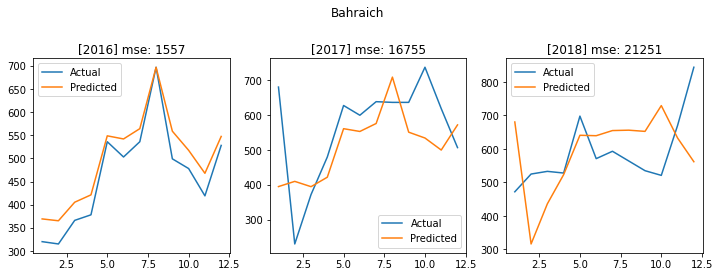

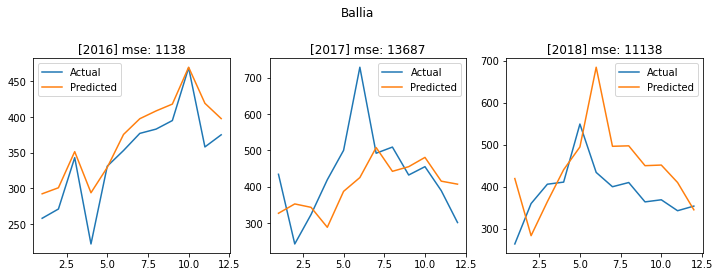

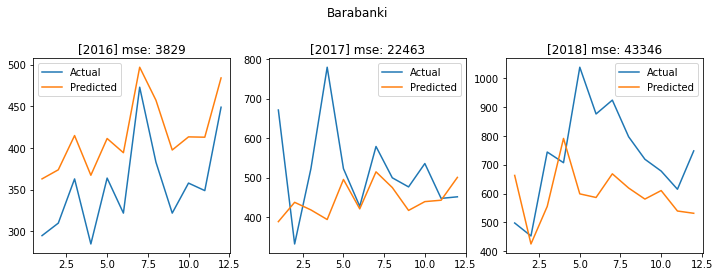

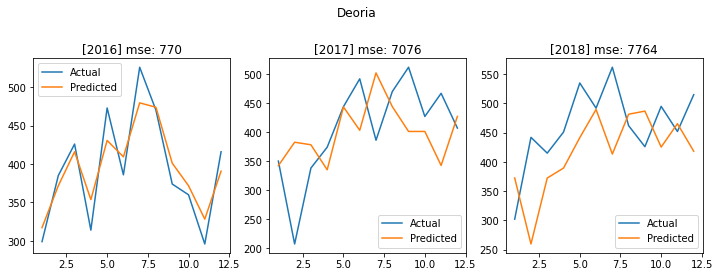

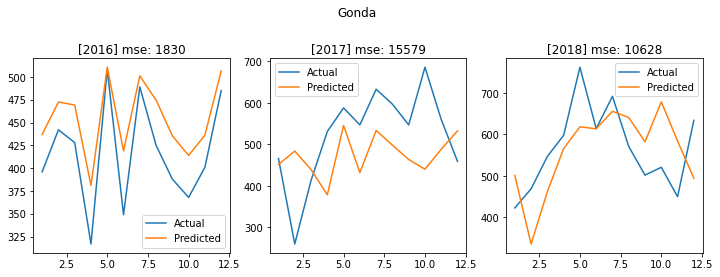

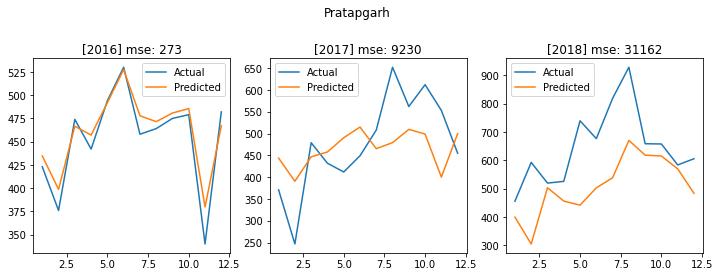

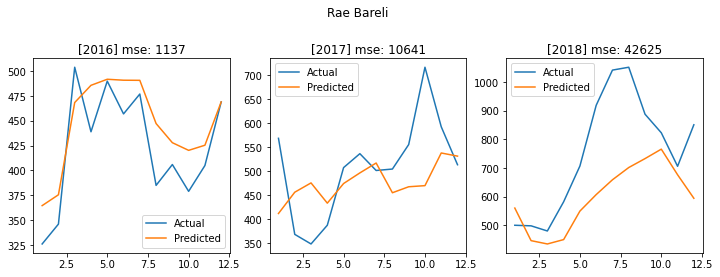

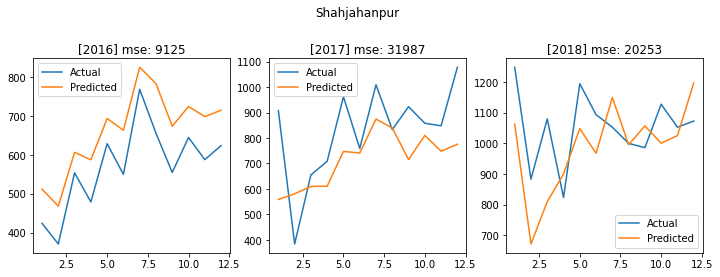

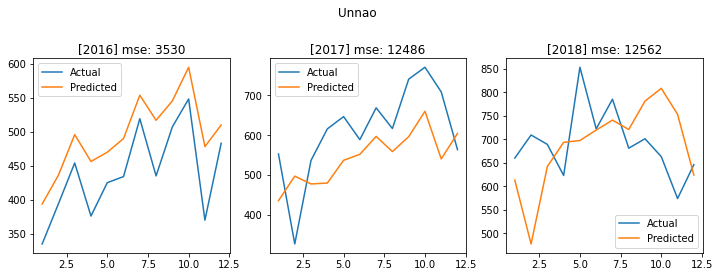

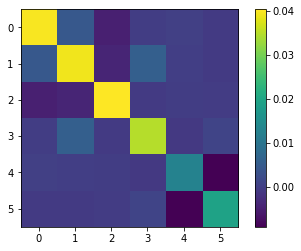

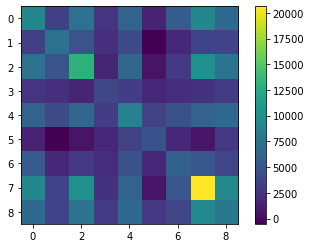

*****begin run for cluster 1************************************
Number of districts:  9
Shape of X_train, Y_train, X_test, Y_test
(9, 24, 6) (9, 24) (9, 36, 6) (9, 36)

Generating permutations : 
[18 10 21  1 11  9 17 12  5  0  4 20  8 19 15 23  2  6 16 13  7 14  3 22]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(9, 24, 6) (9, 24) (9, 36, 6) (9, 36)



alpha 
 [46.324132   29.6157709  38.39911795 83.83042951 39.72858304 50.56120386
 60.51444686 32.43274535 46.89962496]
beta 
 [[ 0.20795727 -0.76590577 -0.03071614  1.1898179   0.0548553   0.89716081]
 [ 0.20829207 -0.76669005 -0.03088898  1.18786954  0.00986522  0.88244971]
 [ 0.20782615 -0.7665479  -0.03301337  1.18941157 -0.00647029  0.94419282]
 [ 0.20745733 -0.76671626 -0.03026195  1.19094611  0.1262647   0.87637912]
 [ 0.20645701 -0.76668335 -0.03289173  1.19014018  0.11675554  0.87312351]
 [ 0.20666367 -0.76773716 -0.03085512  1.18800308 -0.00065268  0.94139363]
 [ 0.2063617  -0.76673997 -0.02930367  1.18848029 -0.00689092  0.89510328]
 [ 0.20937675 -0.76656386 -0.03060817  1.1892571   0.07634578  0.94082069]
 [ 0.20771658 -0.76790588 -0.03079273  1.18891536  0.06574296  0.8987971 ]]



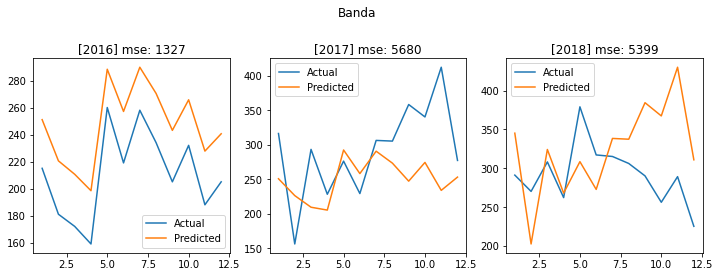

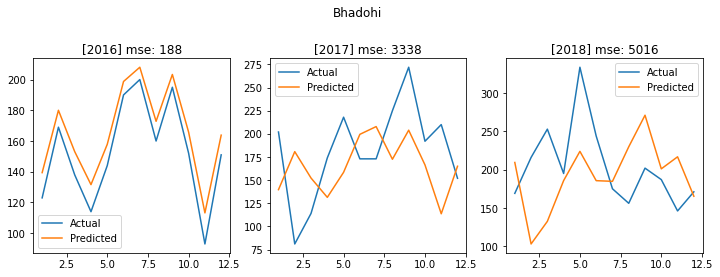

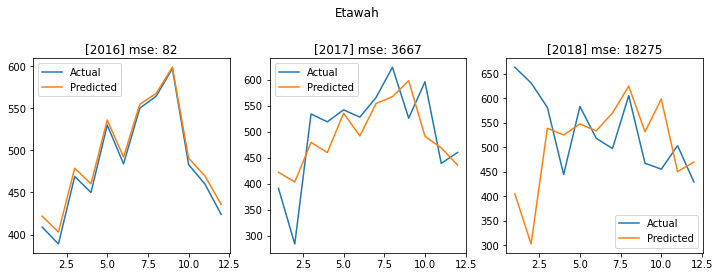

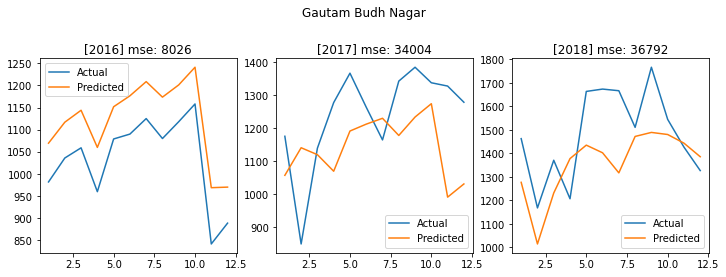

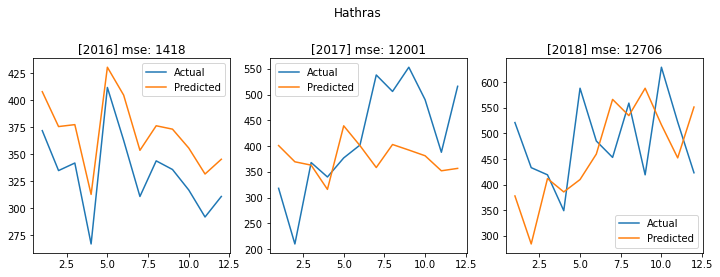

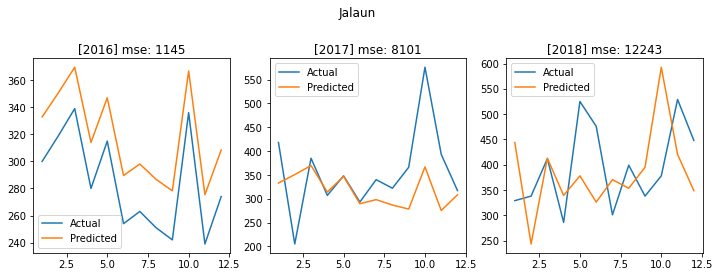

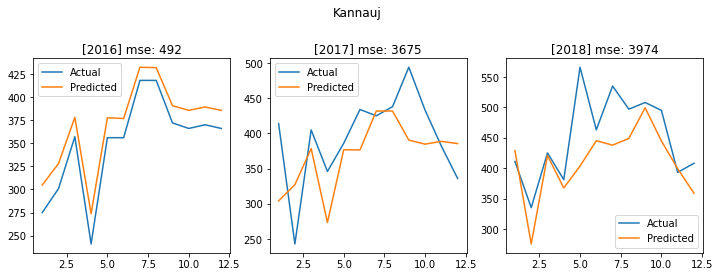

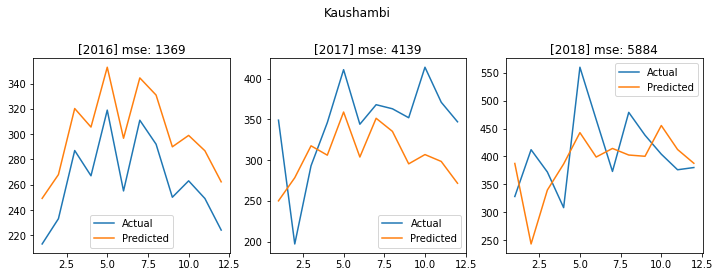

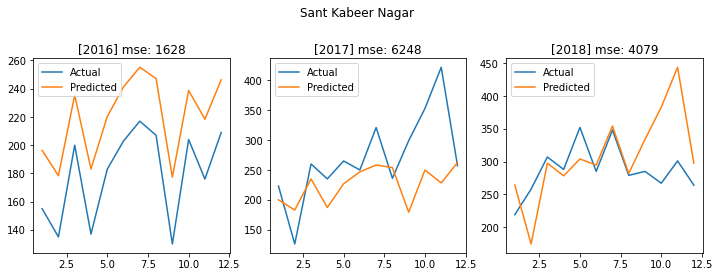

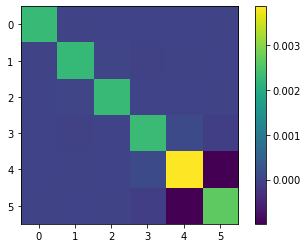

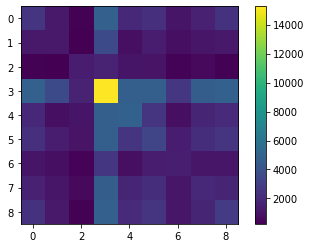

*****begin run for cluster 2************************************
Number of districts:  10
Shape of X_train, Y_train, X_test, Y_test
(10, 24, 6) (10, 24) (10, 36, 6) (10, 36)

Generating permutations : 
[13 10 17 23 22  8  6  0 19  5  7 18  4  1 15 11  3  9 20  2 14 12 21 16]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(10, 24, 6) (10, 24) (10, 36, 6) (10, 36)



alpha 
 [ 48.79012942  57.20785968  82.94786816 114.04131685  70.06707193
  52.95464028 133.86612375 106.98682546  43.63144974  65.54285227]
beta 
 [[1.05960579 1.22183376 1.6979535  2.70429817 0.15185387 0.82288199]
 [1.06059319 1.22084433 1.69977915 2.7044242  0.10038084 0.84603514]
 [1.05939855 1.22216039 1.69842405 2.70499193 0.16019997 0.80640593]
 [1.05820116 1.22219878 1.69743391 2.70440448 0.19319602 0.80276962]
 [1.06101586 1.22038446 1.69820827 2.70392262 0.101405   0.87262583]
 [1.0604068  1.22120625 1.69760747 2.70391933 0.19742426 0.82795631]
 [1.06151579 1.21961896 1.69942649 2.70515463 0.06813382 0.87888968]
 [1.06086261 1.22201417 1.69898369 2.70411179 0.1565926  0.84680833]
 [1.05955568 1.2227204  1.69796396 2.70406856 0.14957395 0.81867201]
 [1.06040304 1.22136445 1.69840664 2.70528416 0.14517045 0.83181771]]



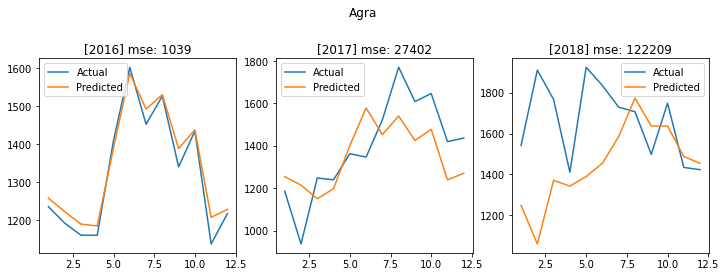

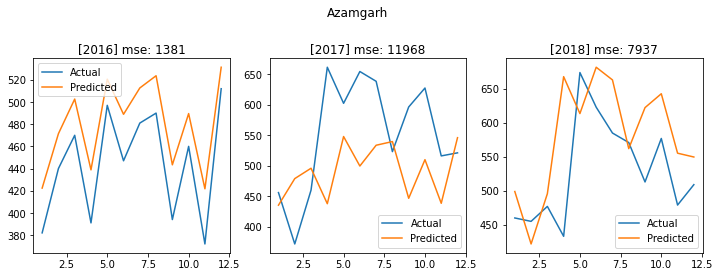

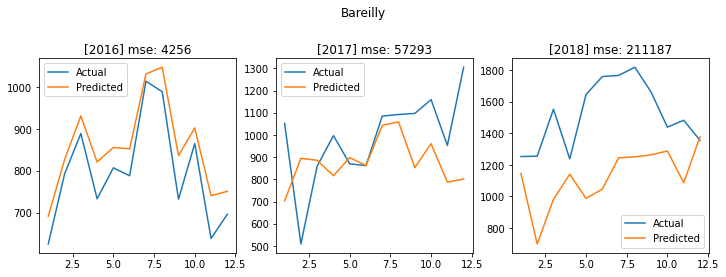

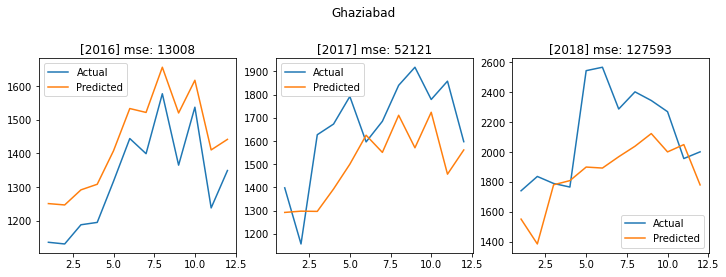

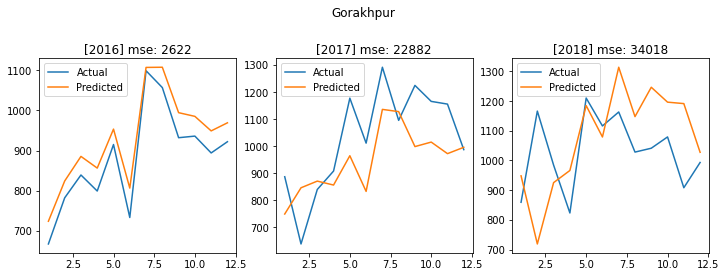

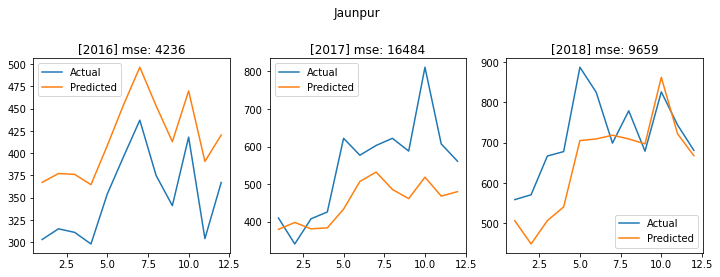

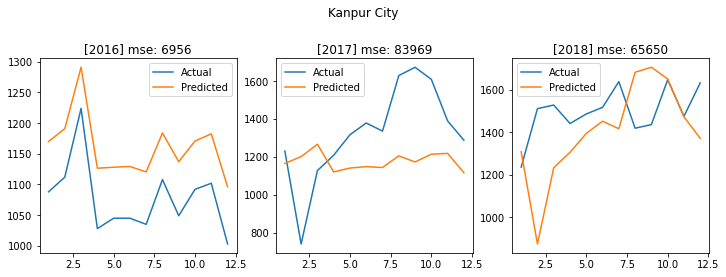

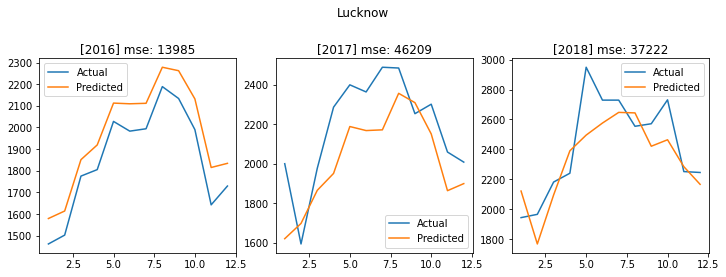

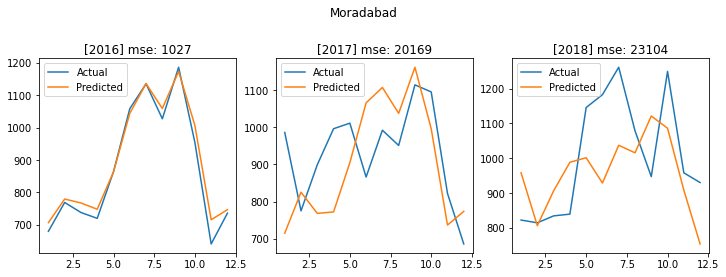

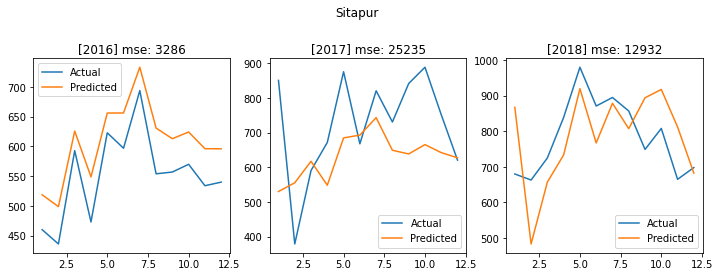

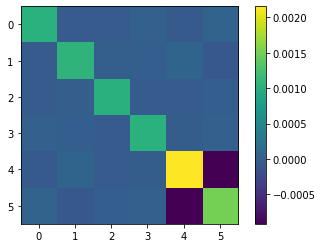

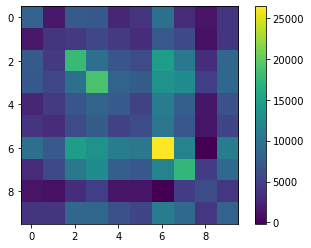

*****begin run for cluster 3************************************
Number of districts:  9
Shape of X_train, Y_train, X_test, Y_test
(9, 24, 6) (9, 24) (9, 36, 6) (9, 36)

Generating permutations : 
[ 0  6  3  8 22 17 10  5 15  1 18 14 23 19  7 16 20 13 11  2 12  9 21  4]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(9, 24, 6) (9, 24) (9, 36, 6) (9, 36)



alpha 
 [ 71.30679932  34.41715401  88.52908873  98.41925915 207.79768217
  79.25642637 102.88014307 147.20620953  47.35905568]
beta 
 [[1.9499856  0.11222972 1.22517977 1.42766701 0.00893756 0.75710918]
 [1.95257755 0.11209207 1.22601341 1.43092938 0.20929127 0.80734876]
 [1.95150347 0.11231468 1.22546365 1.42922932 0.03567048 0.76720528]
 [1.95051691 0.11190153 1.2258928  1.4282098  0.00889222 0.77056176]
 [1.95147422 0.11290859 1.22598021 1.42855328 0.06771376 0.77441027]
 [1.95123358 0.11207079 1.22573423 1.42785144 0.06641101 0.77185164]
 [1.95119686 0.11258941 1.2256912  1.42937687 0.11383185 0.77438554]
 [1.95165927 0.11247537 1.22584384 1.42939318 0.07176177 0.75288707]
 [1.95142616 0.1119282  1.22543772 1.42897599 0.08647099 0.74669839]]



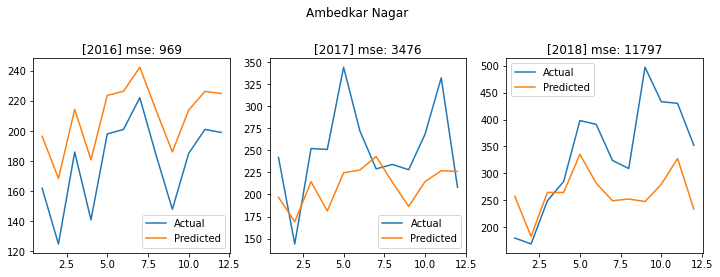

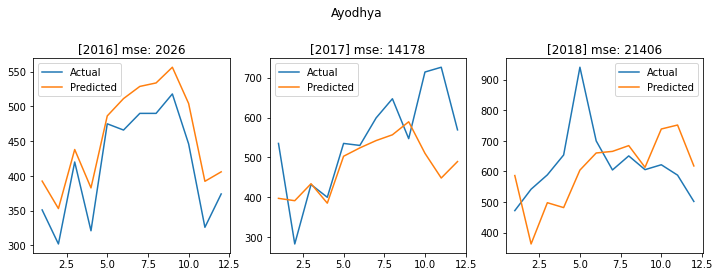

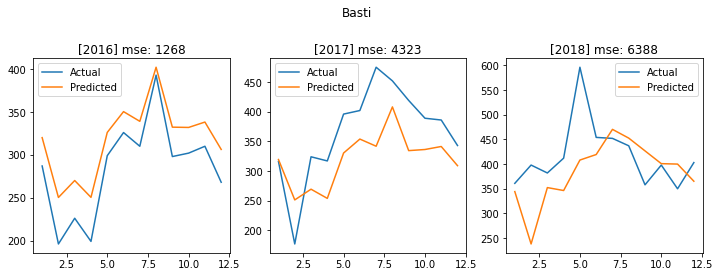

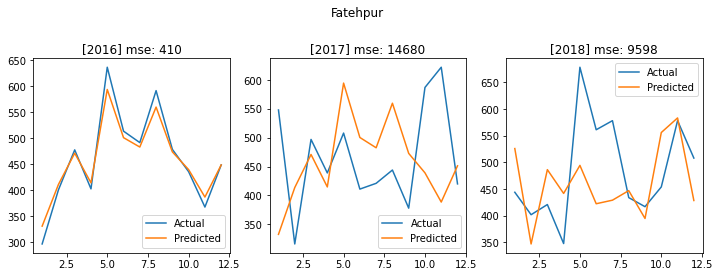

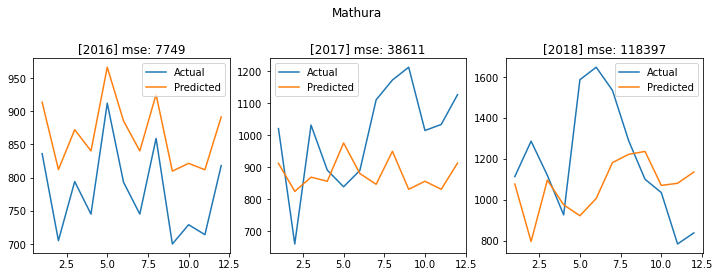

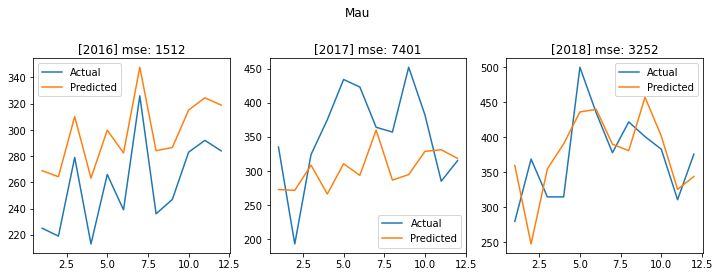

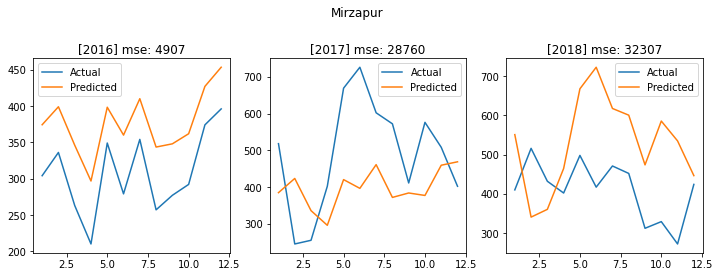

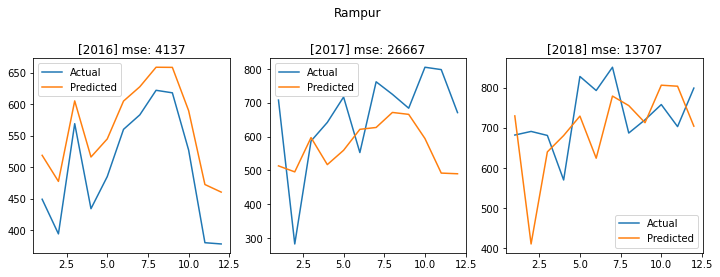

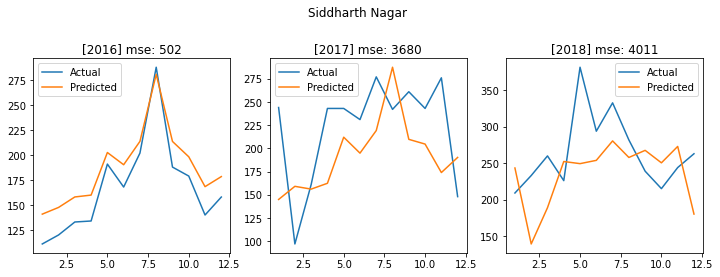

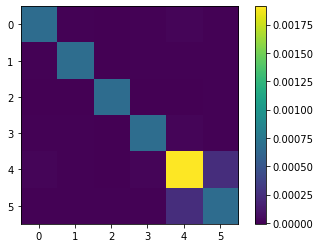

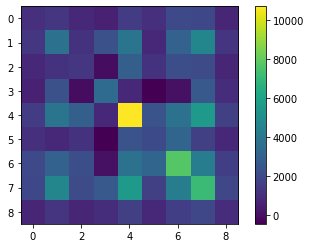

*****begin run for cluster 4************************************
Number of districts:  7
Shape of X_train, Y_train, X_test, Y_test
(7, 24, 6) (7, 24) (7, 36, 6) (7, 36)

Generating permutations : 
[14  4 18  3  5  1 21 12  7  9 16 20 15 19  0  8 23 22 13  2 11  6 17 10]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(7, 24, 6) (7, 24) (7, 36, 6) (7, 36)



alpha 
 [74.42533455 11.61597846 20.22245058 65.3382024  54.56216212 40.88959619
 22.99539586]
beta 
 [[-0.5135935  -0.99682149  0.24253131  0.03945094 -0.02515561  0.98993253]
 [-0.51660422 -0.99632107  0.24246699  0.03787796  0.08426062  0.94726866]
 [-0.51355393 -0.99656225  0.24195029  0.03999092 -0.03860972  1.00730501]
 [-0.51207861 -0.99716571  0.24289335  0.0409674  -0.11613821  1.00790735]
 [-0.51347412 -0.99782717  0.242383    0.03923684 -0.07742595  1.00053854]
 [-0.51298852 -0.99708767  0.24233168  0.04059192 -0.09004799  0.99938022]
 [-0.51449995 -0.99651924  0.24211171  0.03922438  0.01578641  0.99888655]]



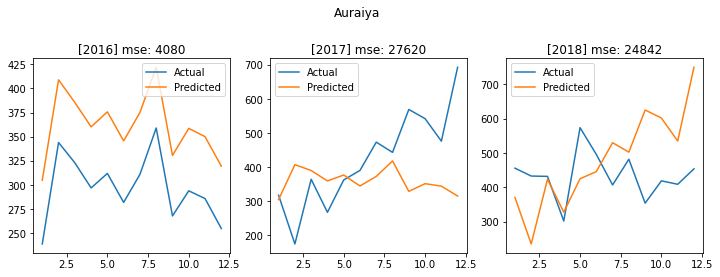

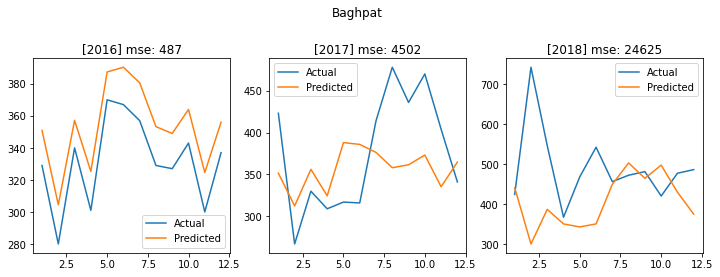

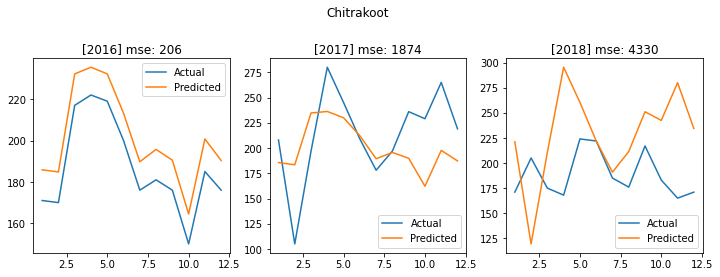

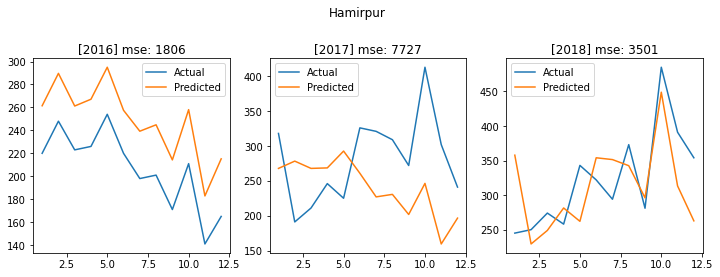

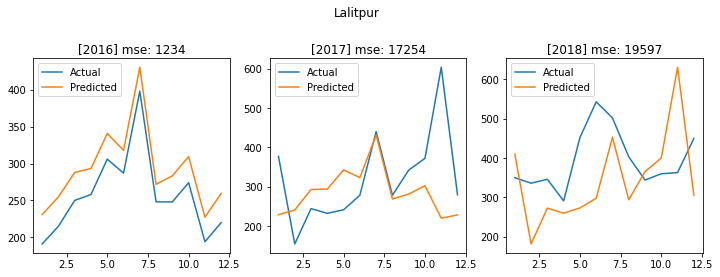

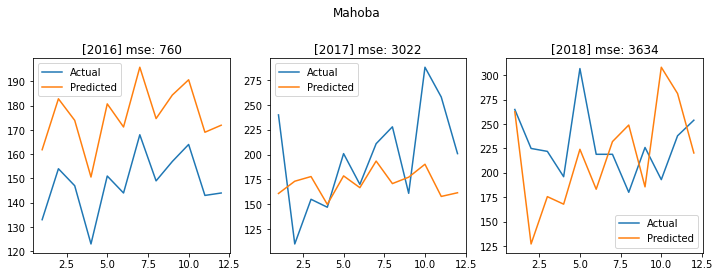

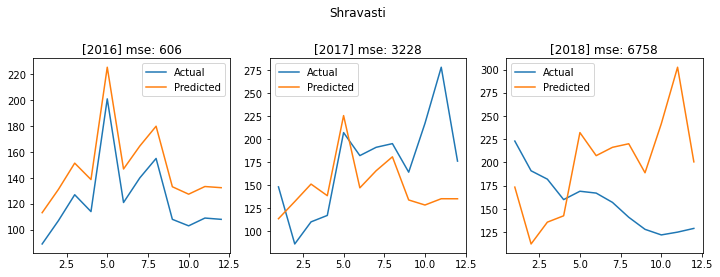

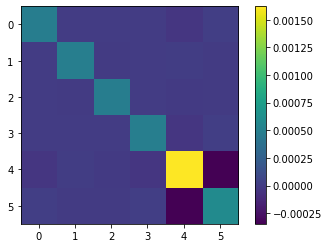

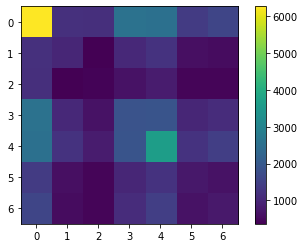

*****begin run for cluster 5************************************
Number of districts:  3
Shape of X_train, Y_train, X_test, Y_test
(3, 24, 6) (3, 24) (3, 36, 6) (3, 36)

Generating permutations : 
[16 15 23 12  3  2 11 18 20 21 22  6 17  7  8 14  5  1  4  0 19 13  9 10]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(3, 24, 6) (3, 24) (3, 36, 6) (3, 36)



alpha 
 [94.48477906 96.93829351 65.00981441]
beta 
 [[0.7903005  0.2912677  0.56709138 0.56802522 0.2387855  0.72103126]
 [0.79082845 0.29163474 0.56729726 0.56706332 0.23013014 0.72434024]
 [0.79042176 0.29119526 0.56604414 0.56752123 0.20760621 0.72912498]]



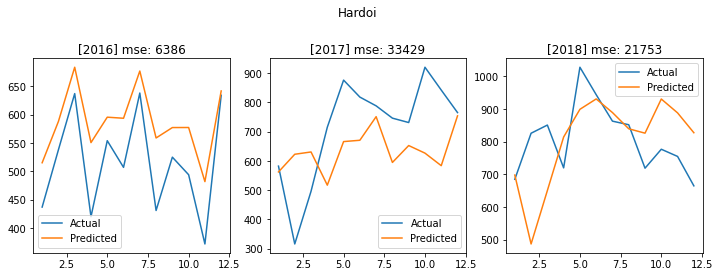

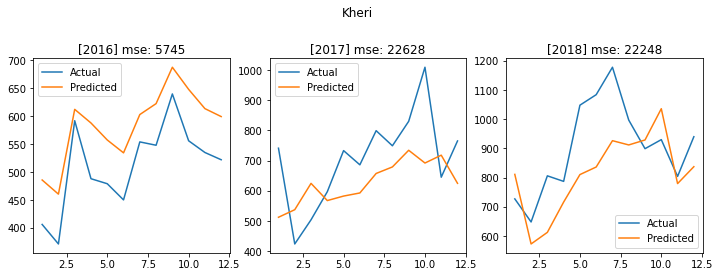

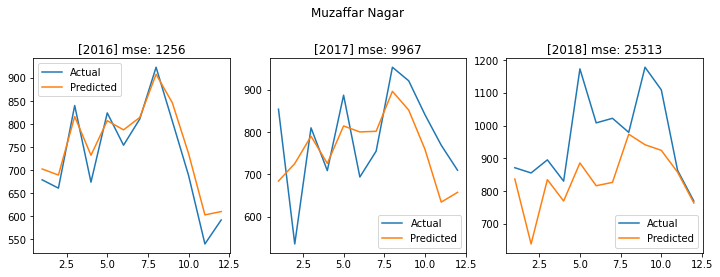

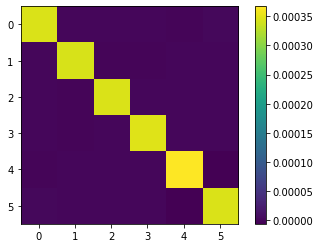

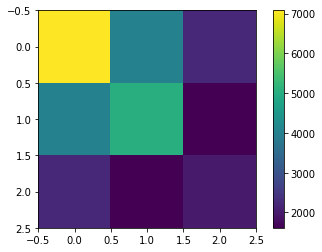

*****begin run for cluster 6************************************
Number of districts:  2
Shape of X_train, Y_train, X_test, Y_test
(2, 24, 6) (2, 24) (2, 36, 6) (2, 36)

Generating permutations : 
[14 15 18 23  1 16  5  8 22 12 17  4  6  3 19  9  0  7 21 11 13 20 10  2]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(2, 24, 6) (2, 24) (2, 36, 6) (2, 36)



alpha 
 [124.76988854  65.41089783]
beta 
 [[0.46726498 0.28050666 0.03933217 0.31439585 0.44485689 0.35325542]
 [0.4665354  0.28092303 0.03948507 0.31368042 0.45268252 0.36439232]]



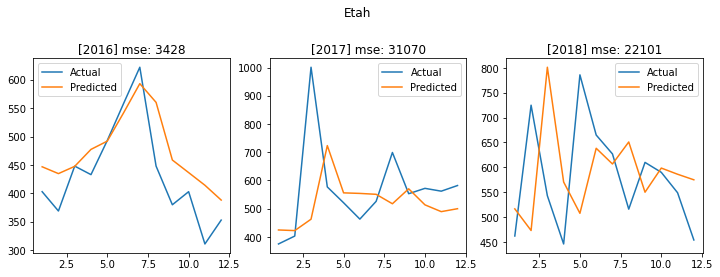

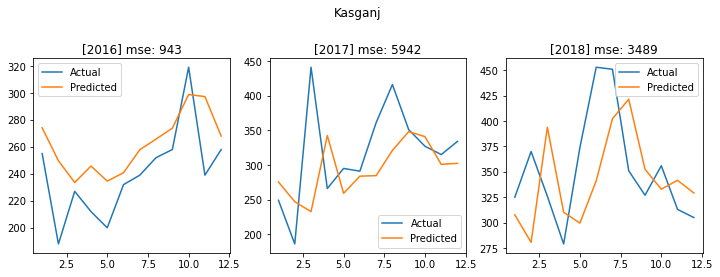

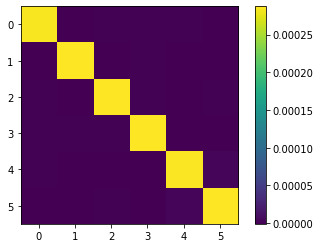

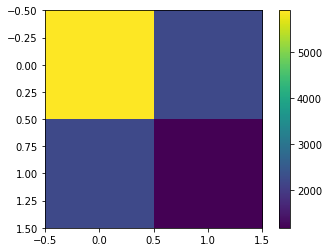

*****begin run for cluster 7************************************
Number of districts:  1
Shape of X_train, Y_train, X_test, Y_test
(1, 24, 6) (1, 24) (1, 36, 6) (1, 36)

Generating permutations : 
[16 14 22  7  1 10 15 23 20  0  3 13 11 17  9 18  8  2  5 21  4 19  6 12]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(1, 24, 6) (1, 24) (1, 36, 6) (1, 36)



alpha 
 [47.85345139]
beta 
 [[-0.69038462 -0.93397339 -0.54045123 -0.16110006  0.60826077  0.41019396]]



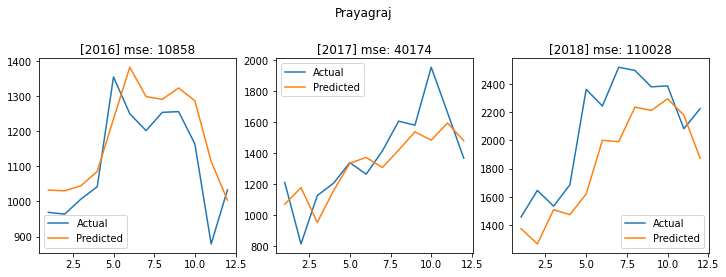

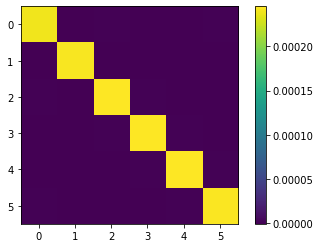

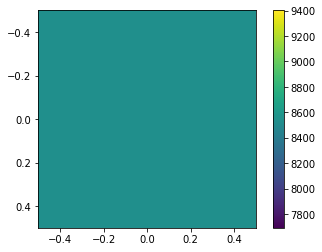

*****begin run for cluster 8************************************
Number of districts:  10
Shape of X_train, Y_train, X_test, Y_test
(10, 24, 6) (10, 24) (10, 36, 6) (10, 36)

Generating permutations : 
[22  8 17  6 15 20 18  5  3  4 10 11  1  0 16 12 19 23  9 14 21  2 13  7]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(10, 24, 6) (10, 24) (10, 36, 6) (10, 36)



alpha 
 [ 65.6569725   52.07634906  36.97827916  92.48081426  50.49516863
  17.38095727 166.5186534   63.1314387   40.0252676  132.93704383]
beta 
 [[ 1.42146993 -0.0083574   2.51669268  1.31238901  0.13075911  0.90629199]
 [ 1.42149438 -0.00836893  2.51688579  1.31261039  0.09638993  0.91351348]
 [ 1.42127199 -0.0087479   2.51721262  1.31213295  0.06415643  0.91212188]
 [ 1.42119822 -0.00844659  2.51656767  1.31234563  0.05214028  0.92249231]
 [ 1.42138502 -0.00815357  2.51717731  1.31236652  0.04163421  0.91334151]
 [ 1.42172528 -0.00806972  2.5170126   1.31209875  0.09310547  0.89741722]
 [ 1.42114256 -0.00847951  2.51680835  1.31219433  0.03329755  0.92740168]
 [ 1.4209767  -0.00852994  2.5167117   1.31292247  0.09095713  0.913679  ]
 [ 1.42136065 -0.00887448  2.51651856  1.31163981  0.10238861  0.89848837]
 [ 1.42141844 -0.00804324  2.51676205  1.31241036  0.12243812  0.90713182]]



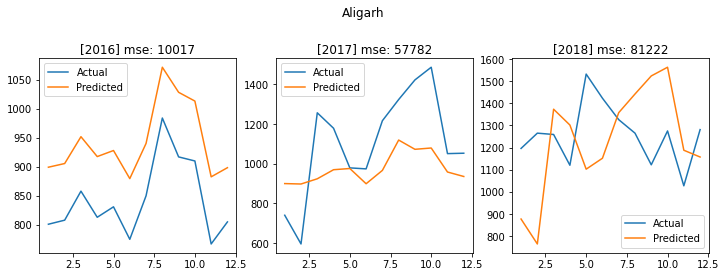

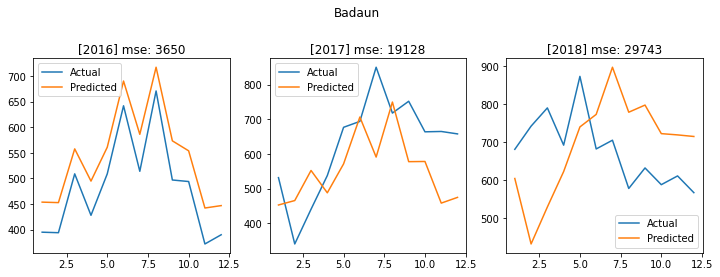

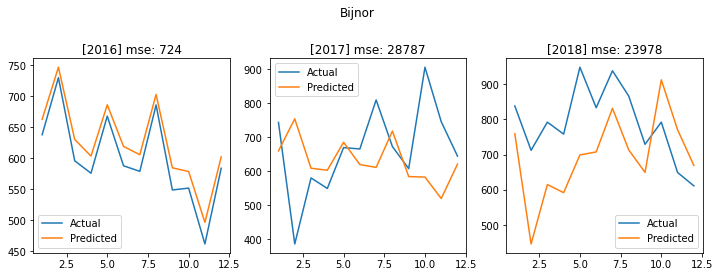

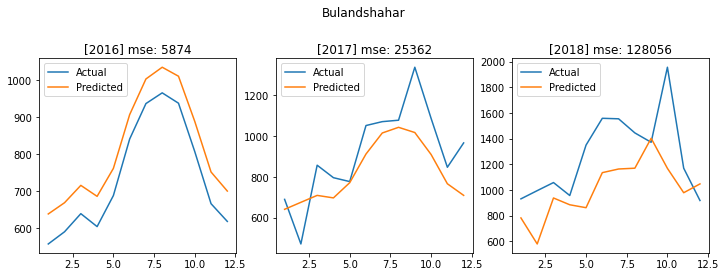

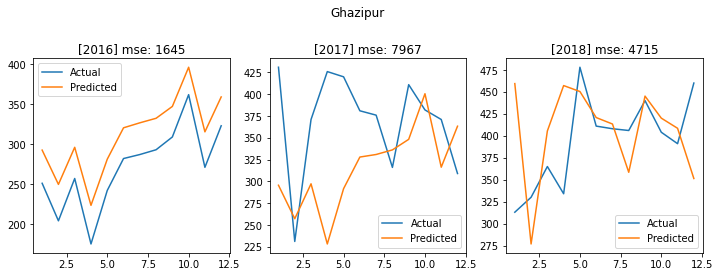

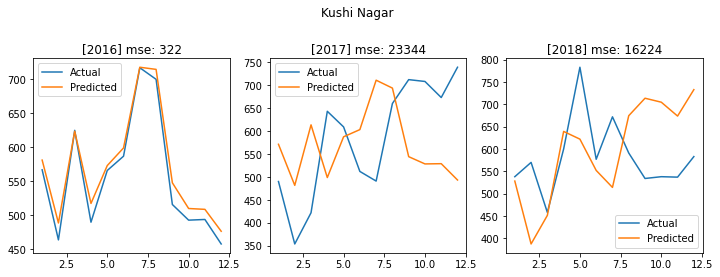

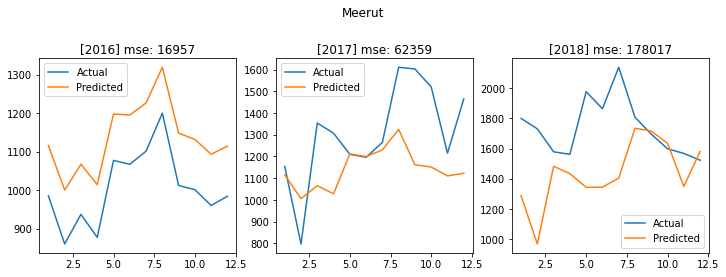

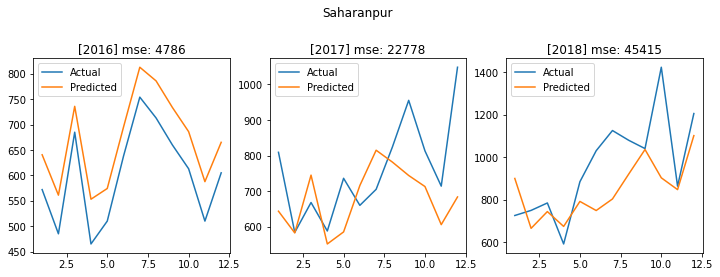

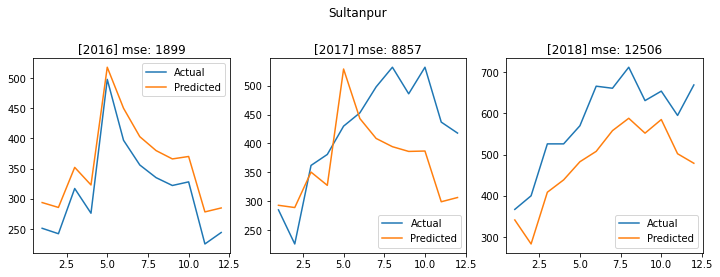

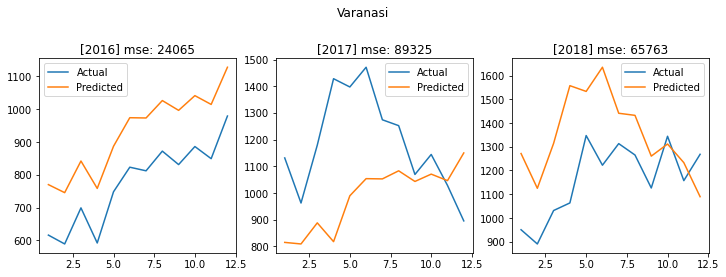

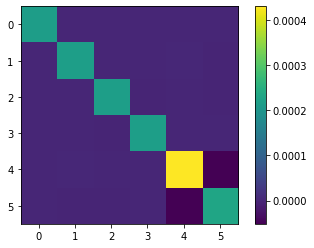

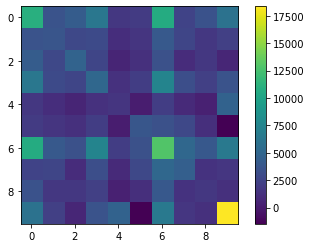

*****begin run for cluster 9************************************
Number of districts:  6
Shape of X_train, Y_train, X_test, Y_test
(6, 24, 6) (6, 24) (6, 36, 6) (6, 36)

Generating permutations : 
[14 12 15  4  6 21  3 23 13  2 11  9  7 20 19 22 18 10  5  8 16  1 17  0]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(6, 24, 6) (6, 24) (6, 36, 6) (6, 36)



alpha 
 [37.76538372 80.63852679 59.8139476  61.44934132 75.89602219 53.56794241]
beta 
 [[0.36058103 0.81761521 1.57336272 0.26359404 0.21371387 0.69280274]
 [0.36049053 0.81730555 1.57376206 0.26357194 0.22653359 0.68547102]
 [0.36074825 0.81761586 1.57332716 0.26327056 0.21803981 0.69215487]
 [0.3607488  0.81709764 1.57377663 0.26371173 0.22187084 0.68810807]
 [0.36039522 0.81735146 1.57360808 0.26340403 0.1995301  0.69421769]
 [0.36056951 0.81742365 1.57337123 0.26318089 0.21681099 0.68851234]]



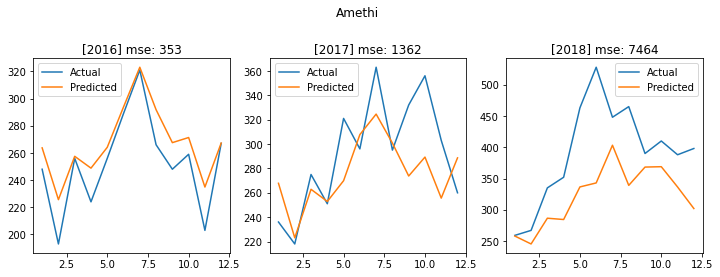

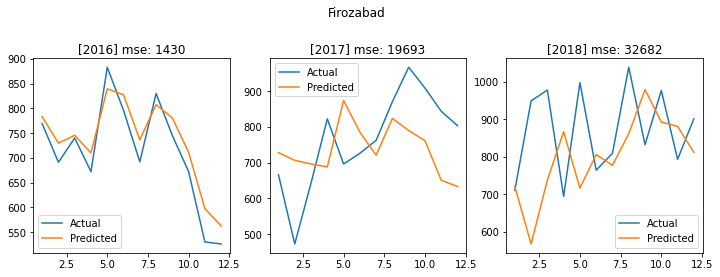

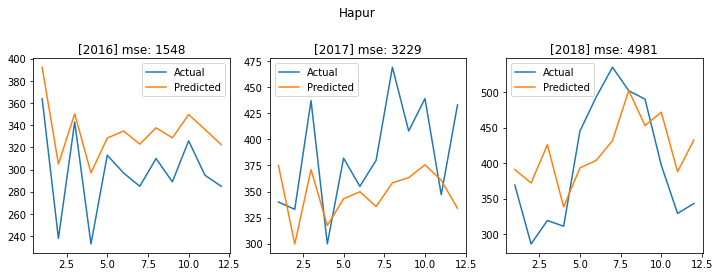

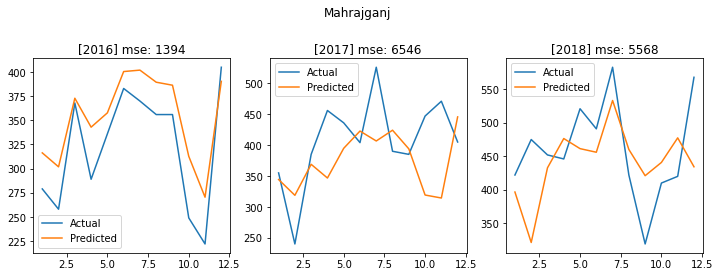

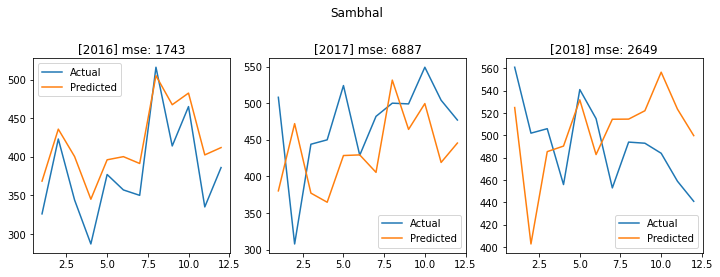

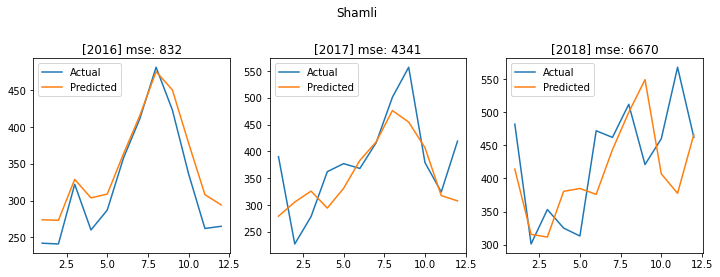

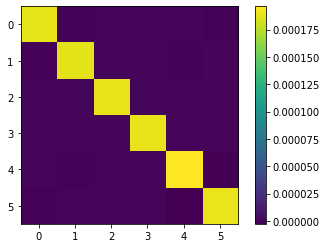

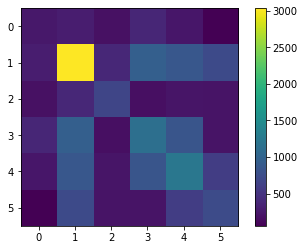

*****begin run for cluster 10************************************
Number of districts:  9
Shape of X_train, Y_train, X_test, Y_test
(9, 24, 6) (9, 24) (9, 36, 6) (9, 36)

Generating permutations : 
[ 6 12  7 23 18 13  4 10 19 21 16 11  2 15  5  3  0 17 14 20  1  9  8 22]
Shape of X_train_pert, Y_train_pert, X_test, Y_test
(9, 24, 6) (9, 24) (9, 36, 6) (9, 36)



alpha 
 [26.335723   38.32213574 52.33905331 86.27611731 52.97694104 90.60975103
 64.7511282  66.41832064 29.4469581 ]
beta 
 [[-0.60827851 -0.44946928  0.76226054 -0.19507782  0.22731385  0.69817185]
 [-0.60832676 -0.4496606   0.76258053 -0.19460658  0.2270711   0.70016335]
 [-0.60829172 -0.449571    0.76285497 -0.19484126  0.22717211  0.70296403]
 [-0.60864175 -0.44962649  0.76262151 -0.19472697  0.22400358  0.69093438]
 [-0.60849781 -0.44940183  0.7627543  -0.19463591  0.22310719  0.701262  ]
 [-0.60827913 -0.44949703  0.76263608 -0.19486836  0.22201965  0.696571  ]
 [-0.60866434 -0.44903351  0.76261392 -0.19480695  0.22173434  0.69157753]
 [-0.60858293 -0.44935143  0.76250506 -0.19499724  0.24120016  0.68803673]
 [-0.60844419 -0.44933954  0.76261718 -0.19443269  0.22896599  0.69050811]]



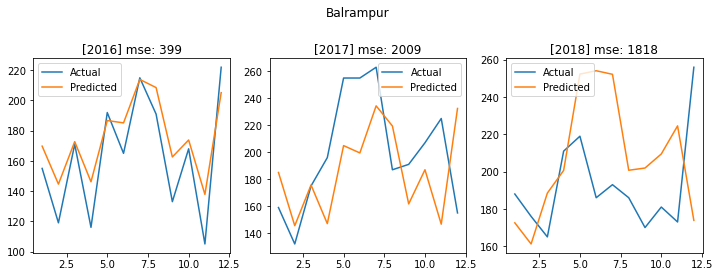

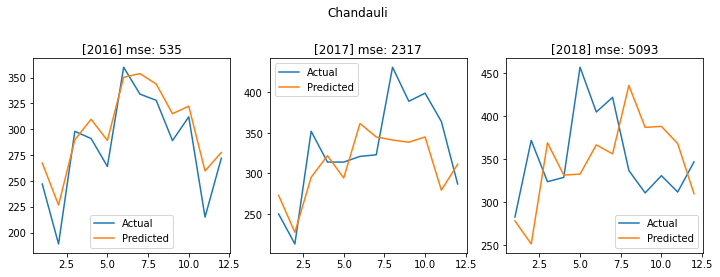

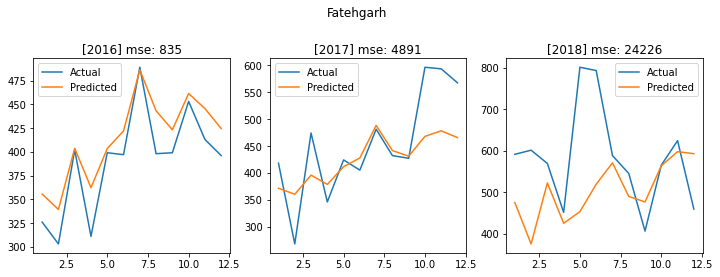

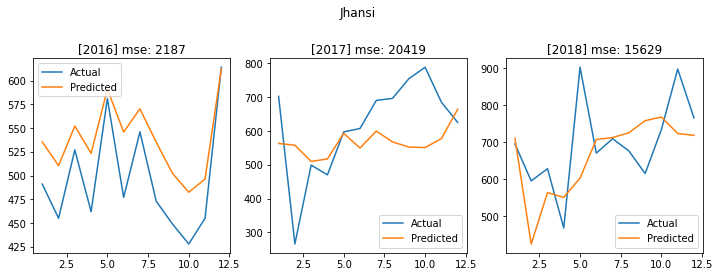

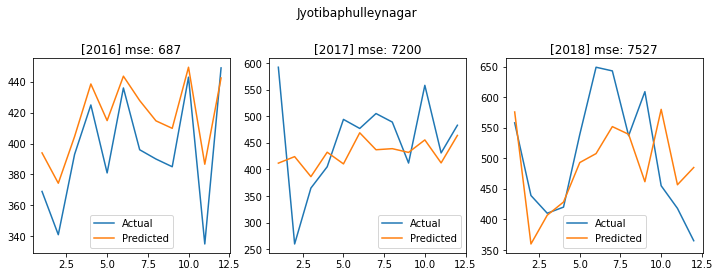

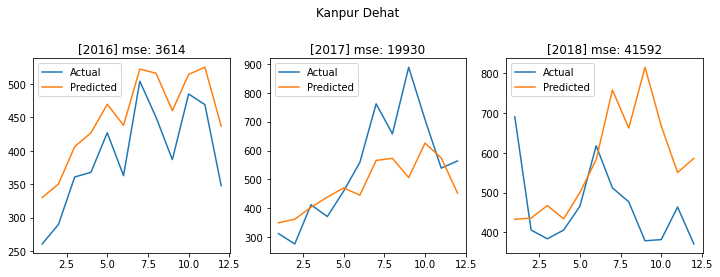

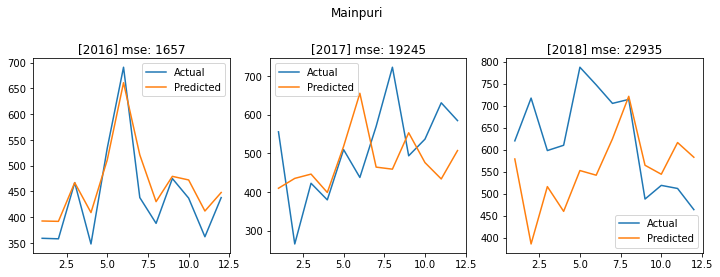

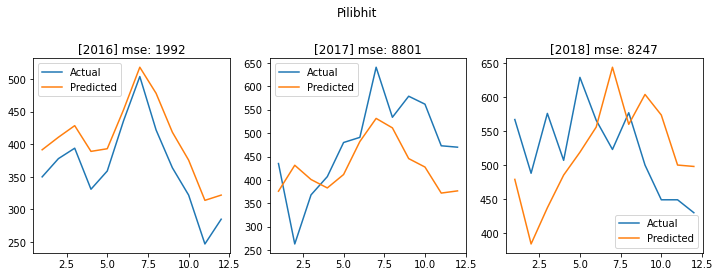

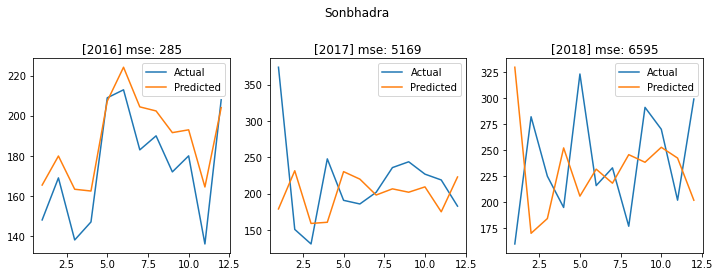

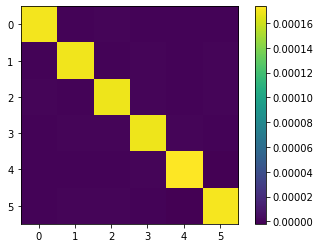

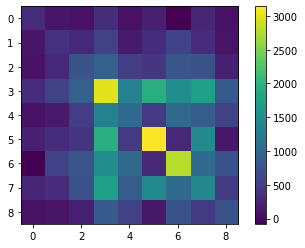

In [39]:
for cluster_ in np.sort(data['class'].unique()):
    runModel(cluster_, 24, 36, data_dict)

### boxplots

In [40]:
color = {
    'c0':'b',
    'c1':'g',
    'c2':'r',
    'c3':'c',
    'c4':'m',
    'c5':'y',
    'c6':'k',
    'c7':'b',
    'c8':'g',
    'c9':'r',
    'c10':'c'
}

In [41]:
def plotbox(data, labels, title, marker):
    fig, ax1 = plt.subplots(figsize=(16, 8))
    fig.canvas.set_window_title('A Boxplot Example')
    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.25)
    
    bp = plt.boxplot(data, notch=0, sym=marker, vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker=marker)
    
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax1.set_axisbelow(True)
    ax1.set_title('Posterior distribution of '+title)
    for i in range(len(label)):
        box = bp['boxes'][i]
        boxX = []
        boxY = []
        for j in range(5):
            boxX.append(box.get_xdata()[j])
            boxY.append(box.get_ydata()[j])
        boxCoords = list(zip(boxX, boxY))

        boxPolygon = Polygon(boxCoords, facecolor=color[label[i]])
        ax1.add_patch(boxPolygon)
        
    ax1.set_xlim(0, len(label) + 1)
    xtickNames = plt.setp(ax1, xticklabels=label)
    #ax1.set_ylim(0, 1.3)
    plt.setp(xtickNames, rotation=90, fontsize=9)
    plt.savefig('./images/pp/{}.png'.format(title))
    plt.show()

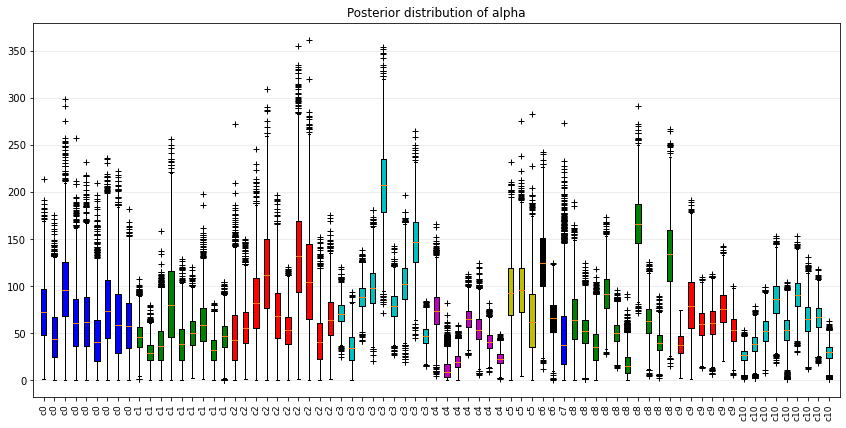

In [42]:
alp = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['alpha'].shape[1]):
        alp.append(clusdict[key]['alpha'][:, each:each+1].reshape(-1))
        label.append(key)
plotbox(alp, label, 'alpha', '+')

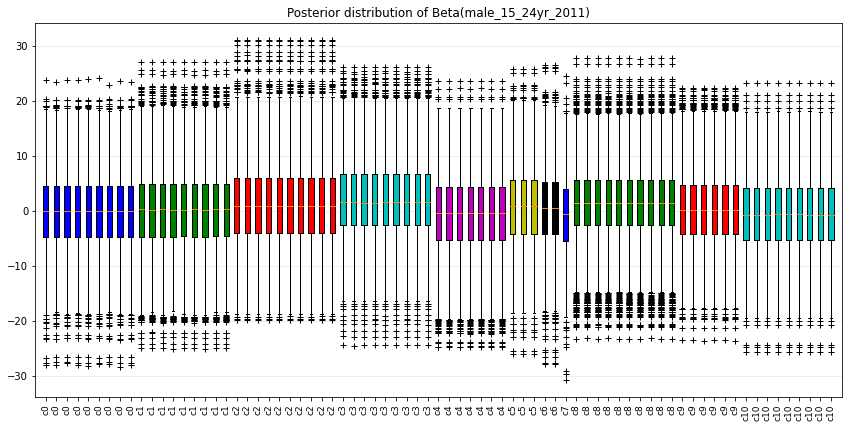

In [50]:
bet0 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet0.append(clusdict[key]['beta'][:, each:each+1, 0:1].reshape(-1))
        label.append(key)
plotbox(bet0, label, 'Beta(male_15_24yr_2011)', '+')

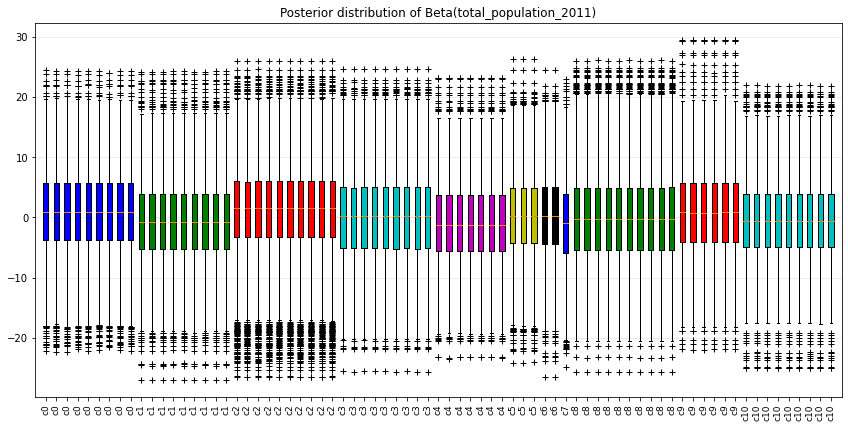

In [51]:
bet1 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet1.append(clusdict[key]['beta'][:, each:each+1, 1:2].reshape(-1))
        label.append(key)
plotbox(bet1, label, 'Beta(total_population_2011)', '+')

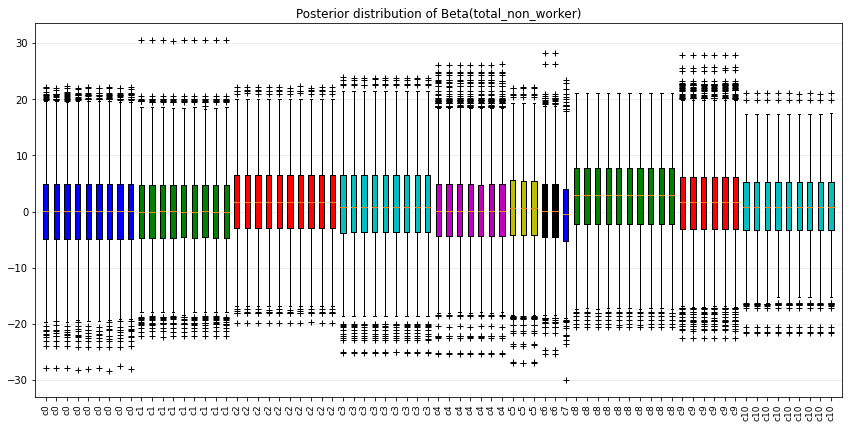

In [52]:
bet2 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet2.append(clusdict[key]['beta'][:, each:each+1, 2:3].reshape(-1))
        label.append(key)
plotbox(bet2, label, 'Beta(total_non_worker)', '+')

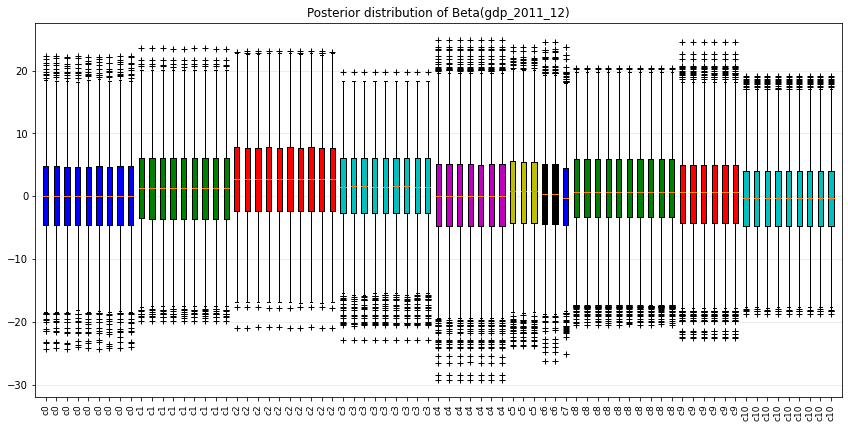

In [53]:
bet3 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet3.append(clusdict[key]['beta'][:, each:each+1, 3:4].reshape(-1))
        label.append(key)
plotbox(bet3, label, 'Beta(gdp_2011_12)', '+')

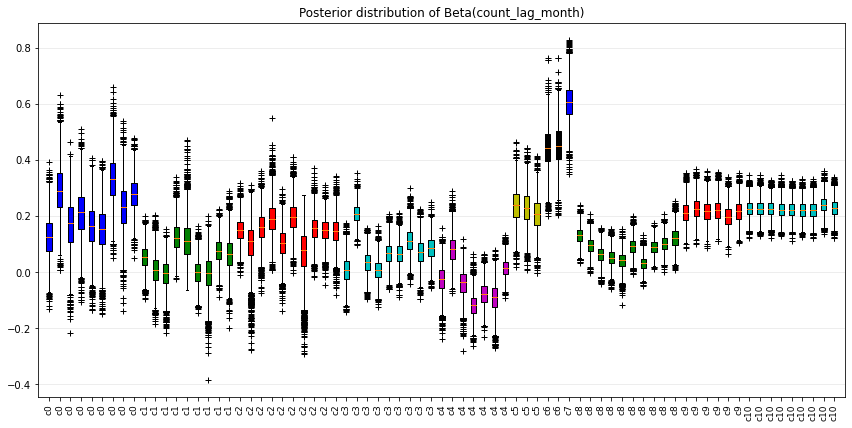

In [54]:
bet4 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet4.append(clusdict[key]['beta'][:, each:each+1, 4:5].reshape(-1))
        label.append(key)
plotbox(bet4, label, 'Beta(count_lag_month)', '+')

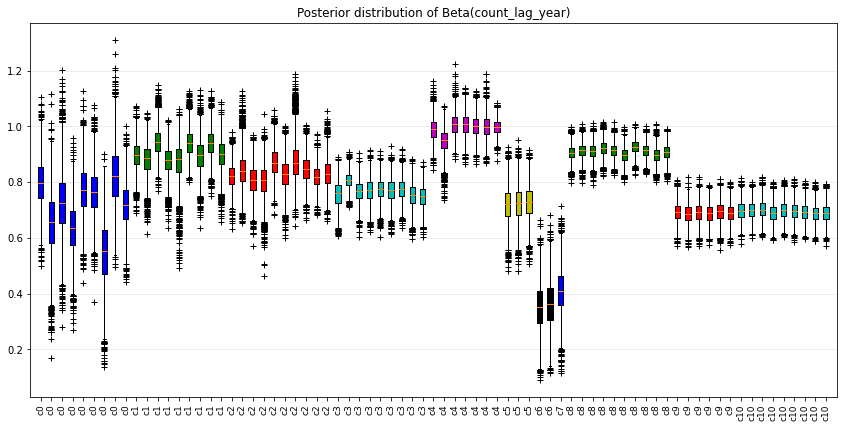

In [55]:
bet5 = []
label = []
for key, value in clusdict.items():
    for each in range(clusdict[key]['beta'].shape[1]):
        bet5.append(clusdict[key]['beta'][:, each:each+1, 5:6].reshape(-1))
        label.append(key)
plotbox(bet5, label, 'Beta(count_lag_year)', '+')